In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report

In [3]:

# Load the dataset 
data = datasets.load_breast_cancer()

# Split up dependent and independent vars
X = data.data
y = data.target

# holding out data for model validation 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# create the isolation forest object and then fit the model 
clf = IsolationForest(contamination='auto', random_state=42)
clf.fit(X_train)

# generate predictions
y_pred_test = clf.predict(X_test)

# convert data to match dataset coding (1 = benine, 0 = malignant) vs. sklearn's output where (1 = inlier, -1 = outlier)
y_pred_test = np.where(y_pred_test == 1, 1, 0)

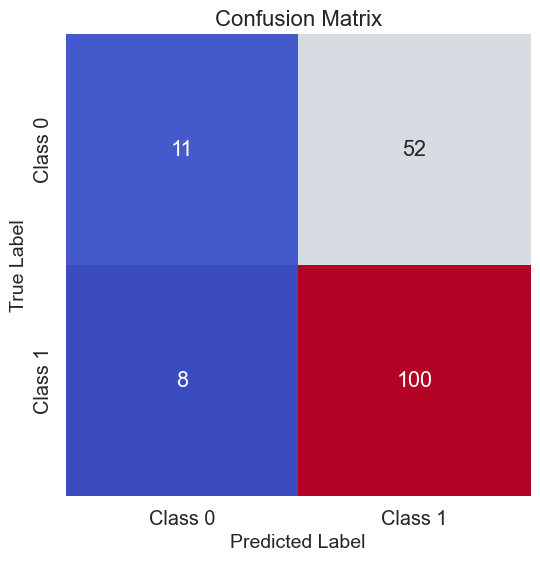


Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.17      0.27        63
           1       0.66      0.93      0.77       108

    accuracy                           0.65       171
   macro avg       0.62      0.55      0.52       171
weighted avg       0.63      0.65      0.58       171



In [5]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.3)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])

plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

In [6]:
# in a binary classifier, the mean of the target variable is the proportion of the class represented by 1
contamination = 1 - y_train.mean()

# fit a new model 
clf_improved = IsolationForest(contamination=contamination, random_state=42)
clf_improved.fit(X_train)

# generate new predictions 
y_pred_test_improved = clf_improved.predict(X_test)

# re-label predictions
y_pred_test_improved = np.where(y_pred_test_improved == 1, 1, 0)

# initial results 
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_improved))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test_improved))

Confusion Matrix:
[[41 22]
 [30 78]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.65      0.61        63
           1       0.78      0.72      0.75       108

    accuracy                           0.70       171
   macro avg       0.68      0.69      0.68       171
weighted avg       0.71      0.70      0.70       171

